In [22]:
import numpy as np

import gsd
import jax
import jax.numpy as jnp
from gsd.gsd import vmin, make_sofvmin
import matplotlib.pyplot as plt

# vmin

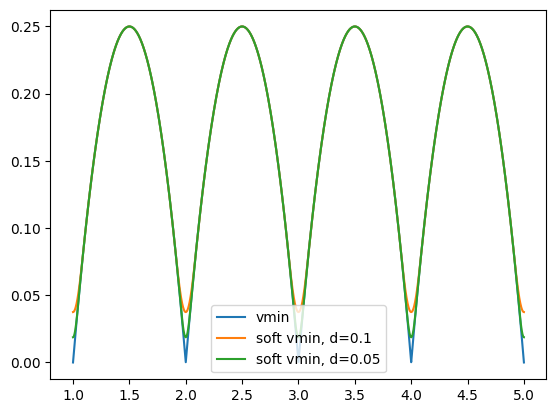

In [23]:
psi = jnp.linspace(1,5,5000)
vm = vmin(psi)
svm = make_sofvmin(0.1)
plt.plot(psi,vm,label='vmin')
plt.plot(psi,svm(psi),label='soft vmin, d=0.1')
plt.plot(psi,make_sofvmin(0.05)(psi),label='soft vmin, d=0.05')
plt.legend()

# Gradient

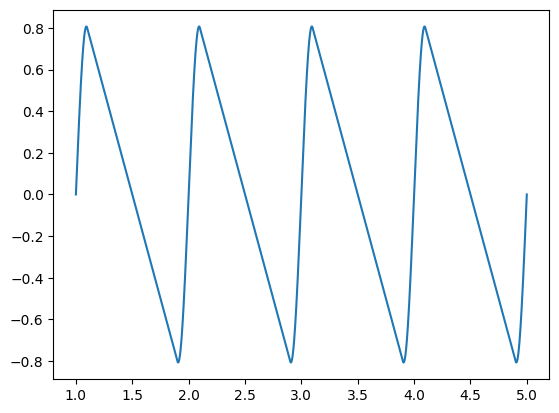

In [24]:
svm = make_sofvmin(0.1)
grad_svm = jax.grad(svm)
grad_svm = jax.vmap(grad_svm) # vectorize
grad_svm = jax.jit(grad_svm) # compile
y = grad_svm(psi)
plt.plot(psi, y)

assert jnp.all(jnp.isfinite(y))

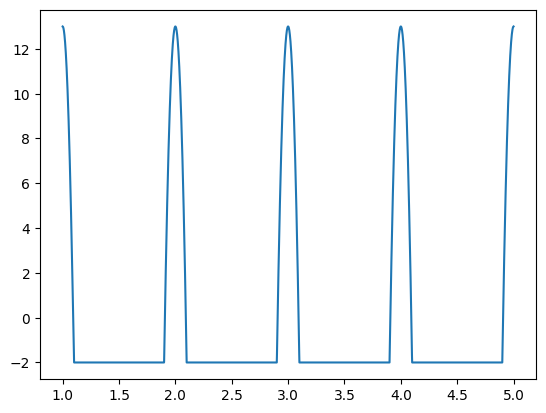

In [27]:
svm = make_sofvmin(0.1)
grad_svm = jax.grad(svm)
grad_svm = jax.grad(grad_svm)
grad_svm = jax.vmap(grad_svm) # vectorize
grad_svm = jax.jit(grad_svm) # compile
y = grad_svm(psi)
plt.plot(psi, y)

assert jnp.all(jnp.isfinite(y))

# Guides

How to select $d$?

The approximation is important only for `psi` close to integer.
In this case, all observations should be equal. 
Let's use Laplace smoothing to estimate `d` from observing `n` identical samples of value `x`.
The probability of observing a neighbor value is `1/(n+2)`.
The resulting variance is then equal to $$\frac{1+n}{(2+n)^2}$$ and this corresponds to
$$d=\frac{8 (1+n)}{3 (2+n)^2}.$$

For the typical experiment, we have $n=24$ so `d=0.0986193`
 